In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import linear_model

In [2]:
df = pd.read_csv('Delhi.csv')
df.head

<bound method NDFrame.head of          Price  Area          Location  No. of Bedrooms  Resale  CarParking
0     10500000  1200  Sector 10 Dwarka                2       1           1
1      6000000  1000       Uttam Nagar                3       0           1
2     15000000  1350      Sarita Vihar                2       1           0
3      2500000   435       Uttam Nagar                2       0           1
4      5800000   900        Dwarka Mor                3       0           1
...        ...   ...               ...              ...     ...         ...
4993   2500000   540       Madhu Vihar                2       1           9
4994   3000000   540       Madhu Vihar                2       1           9
4995   2600000   415  Sector 26 Dwarka                1       1           9
4996   5500000   415  Sector 26 Dwarka                1       1           9
4997   4200000   900       Uttam Nagar                3       1           9

[4998 rows x 6 columns]>

In [7]:
df['Prsqft'] = df['Price']/df['Area']

In [10]:
df.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,CarParking,Prsqft
0,105.0,1200,Sector 10 Dwarka,2,1,1,8750.000000
1,60.0,1000,Uttam Nagar,3,0,1,6000.000000
2,150.0,1350,Sarita Vihar,2,1,0,11111.111111
3,25.0,435,Uttam Nagar,2,0,1,5747.126437
4,58.0,900,Dwarka Mor,3,0,1,6444.444444


In [9]:
df['Price'] = df['Price']/100000

In [16]:
df.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,CarParking,Prsqft
0,105.0,1200,Sector 10 Dwarka,2,1,1,8750.000000
1,60.0,1000,Uttam Nagar,3,0,1,6000.000000
2,150.0,1350,Sarita Vihar,2,1,0,11111.111111
3,25.0,435,Uttam Nagar,2,0,1,5747.126437
4,58.0,900,Dwarka Mor,3,0,1,6444.444444


In [18]:
df2 = df.copy()
df2

,Price,Area,Location,No. of Bedrooms,Resale,CarParking,Prsqft
0,105.0,1200,Sector 10 Dwarka,2,1,1,8750.000000
1,60.0,1000,Uttam Nagar,3,0,1,6000.000000
2,150.0,1350,Sarita Vihar,2,1,0,11111.111111
3,25.0,435,Uttam Nagar,2,0,1,5747.126437
4,58.0,900,Dwarka Mor,3,0,1,6444.444444
...,...,...,...,...,...,...,...
4993,25.0,540,Madhu Vihar,2,1,9,4629.629630
4994,30.0,540,Madhu Vihar,2,1,9,5555.555556
4995,26.0,415,Sector 26 Dwarka,1,1,9,6265.060241
4996,55.0,415,Sector 26 Dwarka,1,1,9,13253.012048


In [22]:
len(df2['Location'].unique())

339

In [26]:
df2.Location = df2.Location.apply(lambda x: x.strip())
location_stats = df2.groupby('Location')['Location'].agg('count')

In [29]:
location_stats.sort_values(ascending=False)

Location
Noida                761
Uttam Nagar          430
Dwarka Mor           347
Vasant Kunj          263
Burari               144
                    ... 
Siddharth Enclave      1
1 Lane Johri Farm      1
Shankar Vihar          1
59 Sector 22 Road      1
48 Sector 22 Road      1
Name: Location, Length: 339, dtype: int64

In [37]:
len(location_stats[location_stats>=25])

46

In [39]:
location_less_than_25 = location_stats[location_stats<25]
location_less_than_25

Location
1 Lane Johri Farm           1
10 Sector Dwarka            2
3 Dwarka Sector 9 Road      1
47 Sector 22 Road           2
48 Sector 22 Road           1
                           ..
i p extension patparganj    3
joshi road                  1
mayur vihar phase 1         9
param puri                  4
vikaspuri                   4
Name: Location, Length: 293, dtype: int64

In [41]:
df2.Location = df2.Location.apply(lambda x: 'other' if x in location_less_than_25 else x)

In [42]:
df2.groupby('Location')['Location'].agg('count')

Location
Alaknanda                    76
Bindapur                     43
Burari                      144
Chattarpur                   57
Chittaranjan Park            31
Delhi                        59
Delhi Meerut Expressway      31
Dwarka Mor                  347
Dwarka More                  44
Govindpuri                   26
Greater Kailash              91
Hari Nagar                   40
Jamia Nagar                  67
Jasola                       27
Mahavir Enclave              34
Mansa Ram Park               40
New Ashok Nagar              47
Noida                       761
Noida Road                   33
Om Nagar                     65
Paschim Vihar                40
Pitampura                    33
Saket                        36
Sarita Vihar                 61
Sector 10 Dwarka             80
Sector 11 Dwarka             80
Sector 12 Dwarka             78
Sector 13 Dwarka             44
Sector 13 Rohini             26
Sector 19 Dwarka             75
Sector 2 Dwarka              33

In [47]:
df3 = df2.copy()
df3.head(3)
df3.shape

(4998, 7)

In [48]:
df3 = df3[~((df3.Area/df3['No. of Bedrooms'])<=250)]

In [49]:
df3.shape

(4675, 7)

In [50]:
df3.Prsqft.describe()

count      4675.000000
mean      10968.583728
std       26540.798660
min         275.709953
25%        3636.363636
50%        6060.606061
75%       10000.000000
max      615961.538462
Name: Prsqft, dtype: float64

In [61]:
def remove_outliers(df):
    df_out = pd.DataFrame()  # Initialize empty DataFrame with parentheses
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Prsqft)
        std = np.std(subdf.Prsqft)
        reduced_df = subdf[(subdf.Prsqft > (m - std)) & (subdf.Prsqft <= (std + m))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [62]:
df4 = remove_outliers(df3)

## This is the new code from here 

In [3]:
df4 = pd.read_csv('Filter.csv')
import matplotlib as matplotlib

In [29]:
def plot_scatter(df,location): 
    beds2 = df[((df['No. of Bedrooms']==2)&(df.Location==location))]
    beds3 = df[((df['No. of Bedrooms']==3)&(df.Location==location))]
    matplotlib.rcParams['figure.figsize'] = [15,10]
    plt.scatter(beds2.Area, beds2.Prsqft, marker='+', color='blue', label = "2Bhk's")
    plt.scatter(beds3.Area, beds3.Prsqft, color='red', label = "3Bhk's")
    plt.xlabel('Area in Sqft.')
    plt.ylabel('Price per sqft')
    plt.title(location)
    plt.legend()

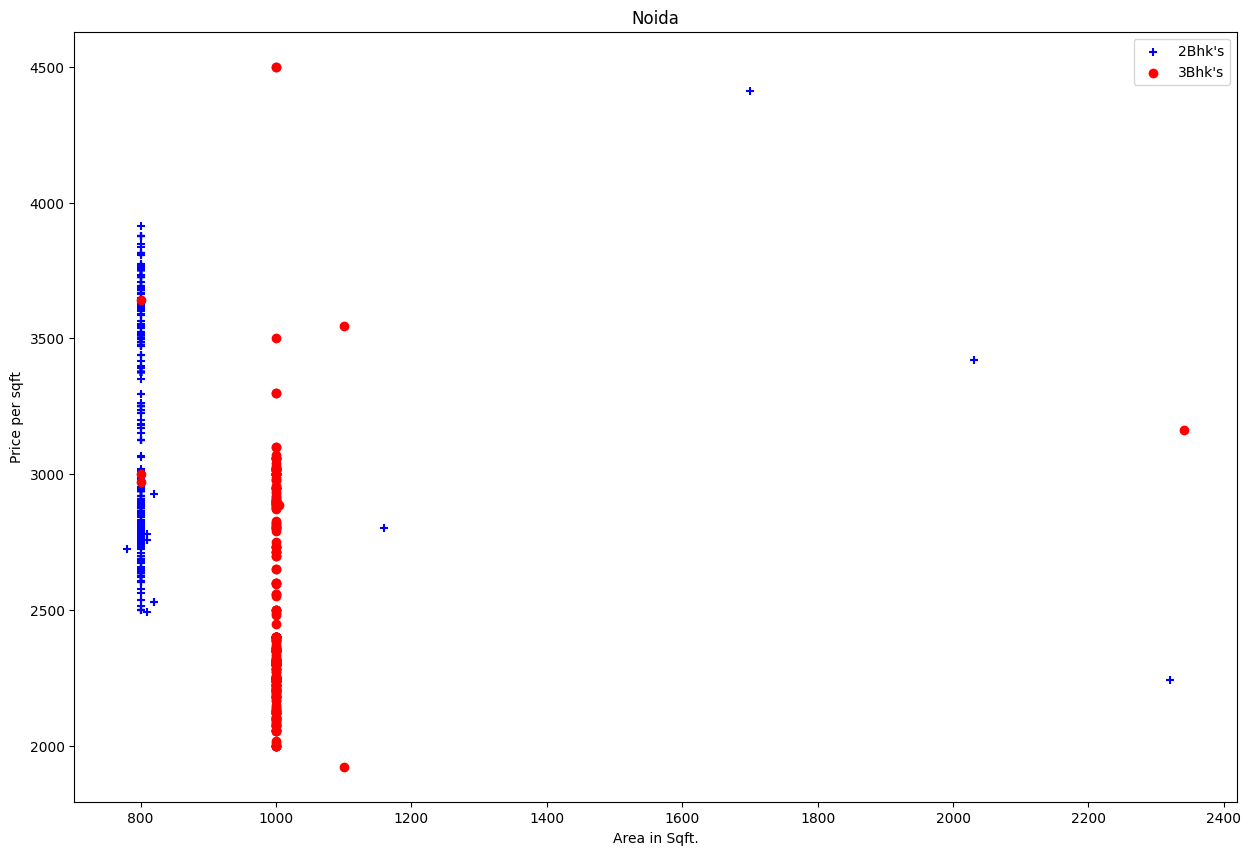

In [30]:
plot_scatter(df4,'Noida')

In [23]:
import numpy as np 
def removing_bhk_outliers(df):  
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('No. of Bedrooms'): 
        bhk_stats[bhk] = {
            'mean' : np.mean(bhk_df.Prsqft), 
            'std' : np.std(bhk_df.Prsqft),
            'count' : bhk_df.shape[0]
        }
    for bhk, bhk_df in location_df.groupby('No. of Bedrooms'): 
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5: 
            exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Prsqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis ='index')

In [26]:
df5 = removing_bhk_outliers(df4)

In [28]:
df5.head(5)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,CarParking,Prsqft
0,0,155.00000,1200,Alaknanda,3,1,0,12916.666667
1,1,163.99999,1650,Alaknanda,4,1,0,9939.393333
2,2,156.00000,1300,Alaknanda,2,1,0,12000.000000
3,3,190.00000,1450,Alaknanda,3,1,0,13103.448276
4,4,190.00000,1450,Alaknanda,3,1,0,13103.448276


Text(0, 0.5, 'Count')

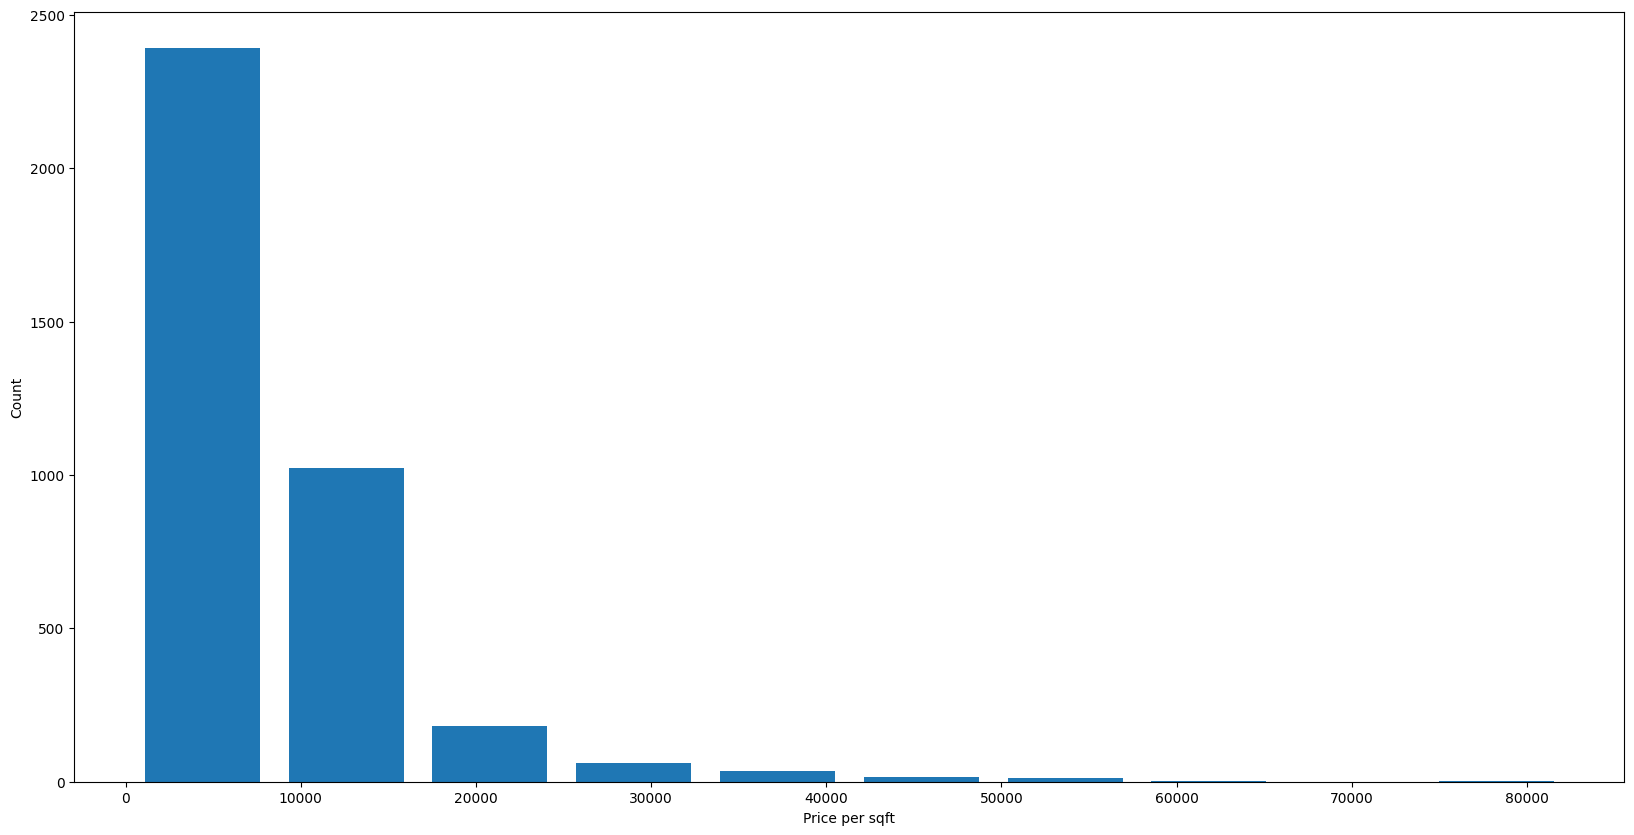

In [35]:
import matplotlib as matplotlib
matplotlib.rcParams['figure.figsize'] = [20,10]
plt.hist(df5.Prsqft,rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [37]:

def remove_outliers_percentile(df, lower_percentile=0.05, upper_percentile=0.95, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    cols = [col for col in df.columns if col not in exclude_cols]
    filtered_df = df.copy()

    for col in cols:
        lower = filtered_df[col].quantile(lower_percentile)
        upper = filtered_df[col].quantile(upper_percentile)
        filtered_df = filtered_df[(filtered_df[col] >= lower) & (filtered_df[col] <= upper)]

    return filtered_df.reset_index(drop=True)


In [43]:
df6 = remove_outliers_percentile(df5, exclude_cols=['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'CarParking'])

In [44]:
df6.shape

(3017, 8)

Text(0, 0.5, 'Count')

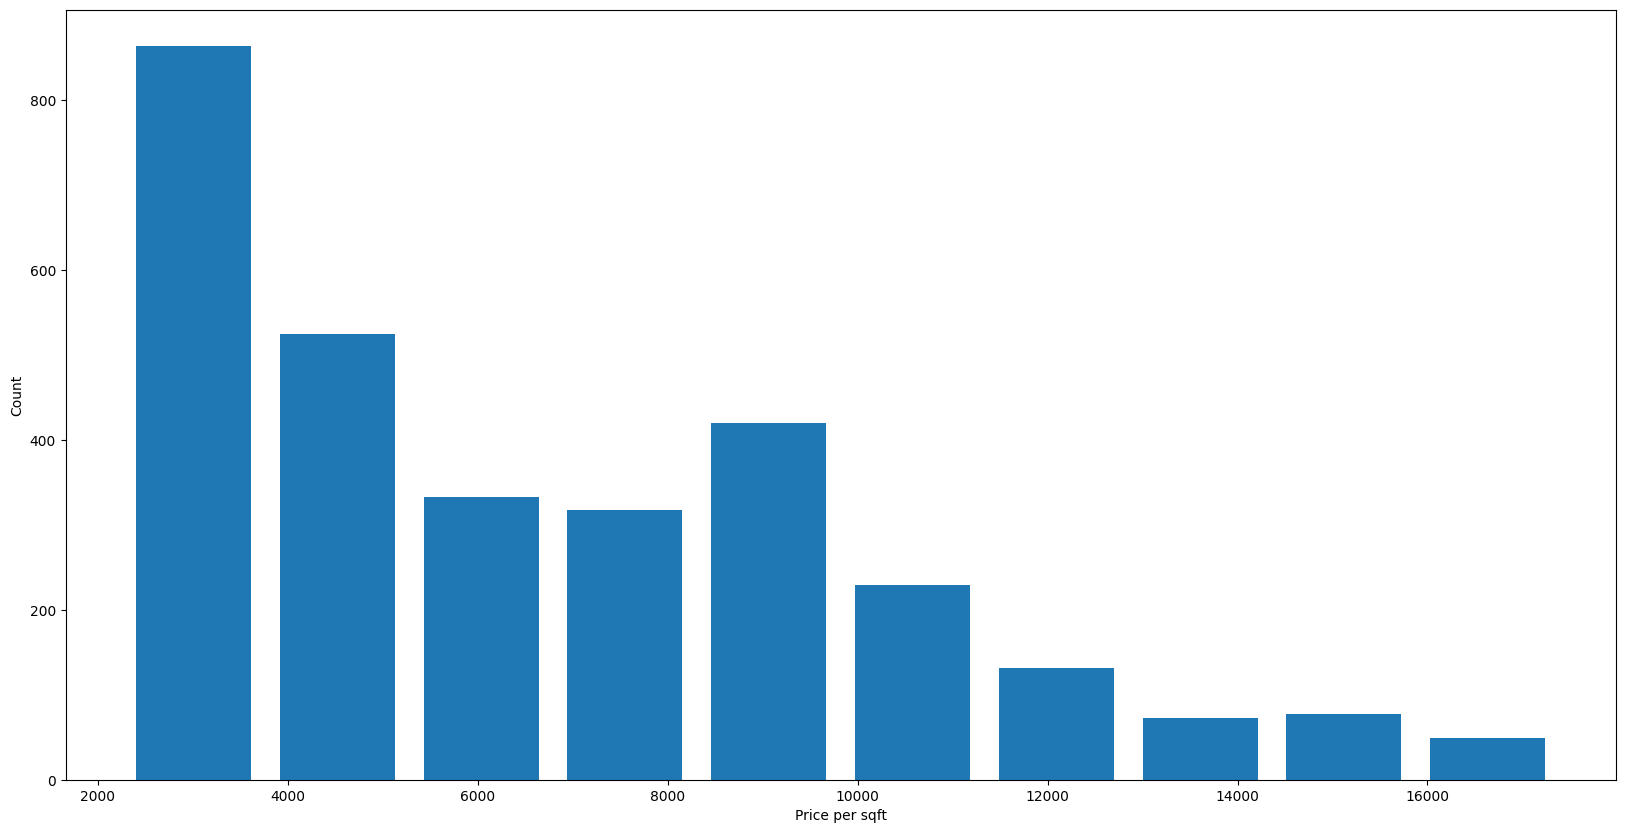

In [46]:
import matplotlib as matplotlib
matplotlib.rcParams['figure.figsize'] = [20,10]
plt.hist(df6.Prsqft,rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [213]:
df6.to_csv('Filter.csv')

In [214]:
dfz = pd.read_csv('Filter.csv')
dfz.head(5)
dfz.groupby('Location')['Location'].agg('count')

Location
Burari                       8
Chattarpur                  44
Chittaranjan Park           26
Delhi                       45
Delhi Meerut Expressway     19
Dwarka Mor                 254
Dwarka More                 36
Govindpuri                  18
Greater Kailash             46
Hari Nagar                  30
Jamia Nagar                 46
Jasola                      22
Mahavir Enclave             26
Mansa Ram Park              27
New Ashok Nagar             33
Noida                      657
Noida Road                  25
Om Nagar                    35
Paschim Vihar               34
Pitampura                   19
Saket                       28
Sarita Vihar                42
Sector 10 Dwarka            70
Sector 11 Dwarka            67
Sector 12 Dwarka            62
Sector 13 Dwarka            39
Sector 13 Rohini            22
Sector 19 Dwarka            69
Sector 2 Dwarka             29
Sector 22 Dwarka            57
Sector 23 Dwarka            29
Sector 23 Rohini            27

In [215]:
dummies = pd.get_dummies(dfz.Location)
dummies.head(5)

,Burari,Chattarpur,Chittaranjan Park,Delhi,Delhi Meerut Expressway,Dwarka Mor,Dwarka More,Govindpuri,Greater Kailash,Hari Nagar,...,Sector 5 Dwarka,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Uttam Nagar,Vasant Kunj,West Punjabi Bagh,nawada,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [216]:
df7 = pd.concat([dfz,dummies.drop('other', axis='columns')],axis= 'columns')

In [217]:
df8 = df7.drop('Location',axis='columns')
df8.head()

,Unnamed: 0.1,Unnamed: 0,Price,Area,No. of Bedrooms,Resale,CarParking,Prsqft,Burari,Chattarpur,...,Sector 4 Dwarka,Sector 5 Dwarka,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Uttam Nagar,Vasant Kunj,West Punjabi Bagh,nawada
0,0,187,20.0,450,1,1,0,4444.444444,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,188,54.0,1125,3,1,0,4800.000000,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2,189,33.0,675,2,1,0,4888.888889,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,190,56.0,1200,3,1,0,4666.666667,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,191,33.0,675,2,1,0,4888.888889,True,False,...,False,False,False,False,False,False,False,False,False,False


In [218]:
df9 = pd.DataFrame(df8)
df9.shape

(3017, 52)

# ML Models

In [1]:
X = df9.drop(['Price','Prsqft','Resale'],axis='columns')
y = df9.Price

NameError: name 'df9' is not defined

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)

NameError: name 'X' is not defined

In [221]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [222]:
reg.score(X_test,y_test)

0.802014885018509

In [223]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.80201489, 0.81241646, 0.81822761, 0.78578945, 0.74886022])

In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_grid_searchcv(X,y): 
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': { 
            }
        }, 
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2], 
                'selection': ['random','cyclic']
            }
        }, 
        'decision tree': {
            'model': DecisionTreeRegressor(), 
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Correct spelling and valid values
                'splitter': ['best', 'random']
    }
}

    }
    scores = [] 
    cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=100) 
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append(
            {
                'model': algo_name,
                'best_score':gs.best_score_, 
                'best_params': gs.best_params_
            }
        )
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
result = find_best_model_using_grid_searchcv(X,y)
result

C:\Users\h4har\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.986e+06, tolerance: 1.421e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\h4har\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+06, tolerance: 1.498e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\h4har\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

,model,best_score,best_params
0,linear_regression,0.802565,{}
1,lasso,0.769271,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision tree,0.728829,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [225]:
def predict_prices(location, sqft, bedrooms, parking):
    x = np.zeros(len(X.columns))
    x[X.columns.get_loc('Area')] = sqft
    x[X.columns.get_loc('No. of Bedrooms')] = bedrooms
    x[X.columns.get_loc('CarParking')] = parking

    # Set the correct location column to 1 (if it exists)
    if location in X.columns:
        x[X.columns.get_loc(location)] = 1
    # else: location not present in training data, all location columns remain 0

    pred = reg.predict([x])[0]
    return max(0, pred)


In [231]:
predict_prices('Chattarpur',2000,3,2)

C:\Users\h4har\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(147.45510877712857)

In [227]:
X_train

,Unnamed: 0.1,Unnamed: 0,Area,No. of Bedrooms,CarParking,Burari,Chattarpur,Chittaranjan Park,Delhi,Delhi Meerut Expressway,...,Sector 4 Dwarka,Sector 5 Dwarka,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Uttam Nagar,Vasant Kunj,West Punjabi Bagh,nawada
2388,2388,2799,750,2,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1093,1093,1382,800,2,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
484,484,728,1000,3,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149,149,355,540,2,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
475,475,717,800,2,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,2009,2414,400,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1180,1180,1483,1000,3,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1344,1344,1682,1000,3,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
527,527,776,650,2,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [228]:
import pickle
with open('delhi_price_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [229]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns] 
}
with open('columns.json','w') as f: 
    f.write(json.dumps(columns))